# CP7  Aprendizaje de Máquinas
---
## Algoritmos de Reducción de Dimensiones

Los datos de muchas dimensiones presentan un reto para los modelos estadísticos. Afortunadamente, gran parte de los datos son redundantes y pueden reducirse a un número menor de variables sin perder mucha información.

Normalmente, usamos la reducción de dimensionalidad en el aprendizaje automático y la exploración de datos. En el aprendizaje automático, lo usamos para reducir la cantidad de características. Esto disminuirá la potencia computacional y posiblemente conducirá a un mejor rendimiento del modelo.

De manera similar, podemos usar la reducción de dimensionalidad para proyectar datos en dos dimensiones. Dicha visualización puede ayudarnos a detectar valores atípicos o clusters de datos.

En esta clase, compararemos cuatro métodos diferentes para lograr dicha tarea: (1) Principle Component Analysis (PCA), (2) Kernel Principle Component Analysis (kPCA) y (3) Linear Discriminant Analysis (LDA) y (4) t-distributed Stochastic Neighbouring Entities (t-SNE). Para esto, usaremos el conjunto de datos de Iris provisto dentro de `scikit-learn`, el cual consta de 150 muestras, cada una con 4 características.

## Ejercicio 1: Análisis del Dataset

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from sklearn import datasets

iris_dataset = datasets.load_iris()
X = iris_dataset.data 
y = iris_dataset.target
target_names = iris_dataset.target_names

iris_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris_df['Species']=iris_dataset['target']
iris_df['Species']=iris_df['Species'].apply(lambda x: iris_dataset['target_names'][x])

Analicemos el contenido del dataset mediante una muestra de sus primeros elementos

In [84]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Veamos que contiene 3 clases, donde cada clase se refiere a un tipo de planta Iris y está representada en 50 elementos

In [85]:
iris_df["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

También podemos ver cómo se separan las clases en función de las diferentes características.

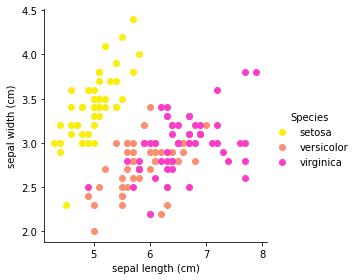

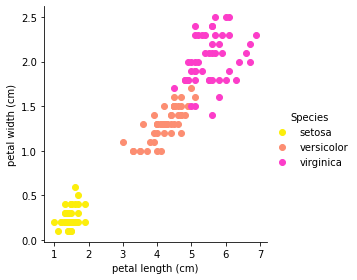

In [86]:
colors = {'Setosa':'#FCEE0C','Versicolor':'#FC8E72','Virginica':'#FC3DC9'}

#Let see how the classes are separated regarding different featueres

sns.FacetGrid(iris_df, hue="Species", height=4, palette=colors.values()) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()


sns.FacetGrid(iris_df, hue= "Species", height=4, palette=colors.values()).\
map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()
plt.show()

La matriz de correlación puede ayudarnos a comprender mejor el conjunto de datos. Nos dice cómo se correlacionan nuestras cuatro características.

<AxesSubplot:>

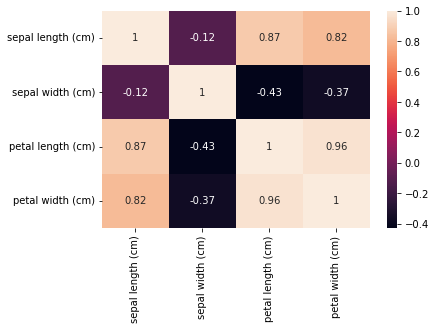

In [87]:
sns.heatmap(iris_df.corr(),annot=True)

En la matriz de correlación, podemos notar una alta puntuación de correlación entre las características Sepal Length y Sepal Width.

## Principal Component Analysis (PCA)

En pocas palabras, PCA es un algoritmo de transformación lineal que busca proyectar las características originales de nuestros datos en un conjunto más pequeño de características (o subespacio) mientras conserva la mayor parte de la información. Para hacer esto, el algoritmo intenta encontrar las direcciones/ángulos más apropiados (que son los componentes principales) que maximizan la varianza en el nuevo subespacio. Sin embargo, ¿por qué maximizar la varianza?

Para responder a la pregunta, se debe dar más contexto sobre el método PCA. Uno tiene que entender que los componentes principales son ortogonales entre sí (piense en ángulo recto). Como tal, al generar la matriz de covarianza (medida de cuán relacionadas están 2 variables entre sí) en nuestro nuevo subespacio, los valores fuera de la diagonal de la matriz de covarianza serán cero y solo las diagonales (o valores propios) serán distintos de cero. Son estos valores diagonales los que representan las *varianzas* de los componentes principales de los que estamos hablando o información sobre la variabilidad de nuestras características.

Por lo tanto, cuando PCA busca maximizar esta varianza, el método está tratando de encontrar direcciones (componentes principales) que contengan la mayor dispersión/subconjunto de puntos de datos o información (varianza) relativa a todos los puntos de datos presentes.

### ¿Cuándo se debería usar PCA?

Es importante tener en cuenta que PCA funciona bien con variables altamente correlacionadas. Si la relación entre las variables es débil, PCA no será efectivo. Puede mirar la matriz de correlación para determinar si usar PCA. Si la mayoría de los coeficientes son inferiores a 0,3, no es una buena idea utilizar PCA.

Además, se pueden mirar los coeficientes de correlación para determinar qué variables están altamente correlacionadas. Si encuentra tales variables, puede usar solo una de ellas en el análisis. Un límite para altamente correlacionado suele ser 0,8.

## Ejercicio 2

Ahora, apliquemos PCA con 2 componentes. Esto nos ayudará a representar nuestros datos en dos dimensiones.

Primero, necesitamos normalizar las características. Para esto usaremos la clase `StandardScaler` mediante su método `fit_transform` para procesar los datos.

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
#Use standard scaler to normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Después de la normalización, podemos transformar nuestras características usando `PCA` con dos componentes mediante el metodo `fit_transform`. 

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca2 = PCA(n_components=2)
X_r = pca2.fit_transform(X)

Grafiquemos ahora nuestro dataset con las dimensiones reducidas:

In [92]:
def plot_reduced_data(dr_method, X_r, title: str='Reduced Data'):
      'Plot the reduced data using The specified dimension reduction method'
      plt.figure(figsize=(8,6))
      
      for color, i, target_name in zip(colors.values(), [0, 1, 2], target_names):
            plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, 
                        label=target_name, s=130, edgecolors='k')
      plt.legend(loc='best', shadow=False, scatterpoints=1)
      plt.xlabel('1st Dimension')
      plt.ylabel('2nd Dimension')
      plt.title(title)

      # Percentage of variance explained for each components

      plt.show()
      
      try:
            print('explained variance ratio (first two components): %s' # First two PCA components capture 0.9776852*100% of total variation!
                        %str(dr_method.explained_variance_ratio_))
      except AttributeError:
            pass

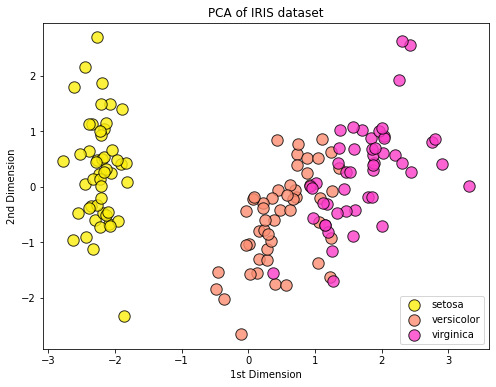

explained variance ratio (first two components): [0.72962445 0.22850762]


In [93]:
plot_reduced_data(pca2, X_r, 'PCA of IRIS dataset')

Podemos ver que Iris Setosa es muy diferente de las otras dos clases. Además, podemos calcular la varianza explicada. La varianza explicada nos dirá cuánto de la varianza ocupan nuestros dos componentes.

Obtuvimos un resultado de 95.8%, en total para los dos primeros componentes. Esto significa que los dos primeros componentes principales ocupan el 95,8% de la varianza. Este es un buen resultado y significa que nuestra representación 2D es significativa. Si esta puntuación fuera inferior al 85 %, significaría que nuestra representación 2D de los datos podría no ser válida.

## Kernel PCA

Kernel PCA es una de las variaciones de PCA en la que usamos métodos kernel para realizar análisis de componentes principales con conjuntos de datos no linealmente separables. Este enfoque es muy similar al estándar pero con un paso de procesamiento diferente.

Un conjunto de datos no lineal de baja dimensión a menudo puede volverse linealmente separable si se proyecta en un espacio especial de alta dimensión. El enfoque Kernel hace lo mismo, logra este objetivo sin tener que usar operaciones no lineales muy difíciles.

### ¿Cuándo debería usar Kernel PCA?

El método Kernel de análisis de componentes principales es un enfoque poderoso cuando el conjunto de datos está formado por elementos que pueden ser una función de los componentes principales, pero no podemos determinar una relación lineal entre ellos.


## Ejercicio 3

A continuación apliquemos Kernel PCA a nuestro dataset. Primero probaremos usando un kernel polinomial. La configuración que se sugiere es  `n_components=2, kernel='poly', degree=2, gamma=1, coef0=0.5`

In [94]:
from sklearn.decomposition import KernelPCA

In [95]:
# Polynomial Kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=2, gamma=1, coef0=0.5)
X_kpca_poly = kpca_poly.fit_transform(X)

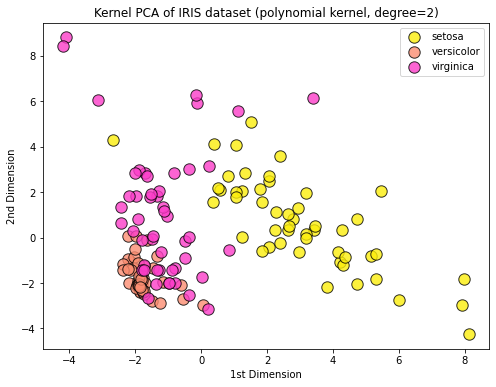

In [96]:
plot_reduced_data(kpca_poly, X_kpca_poly, 'Kernel PCA of IRIS dataset (polynomial kernel, degree=2)')

Ahora vamos a aplicar un kernel radial (`kernel='rbf'`) también con 2 componentes. 

In [97]:
# RBF Kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
X_kpca_rbf = kpca_rbf.fit_transform(X)

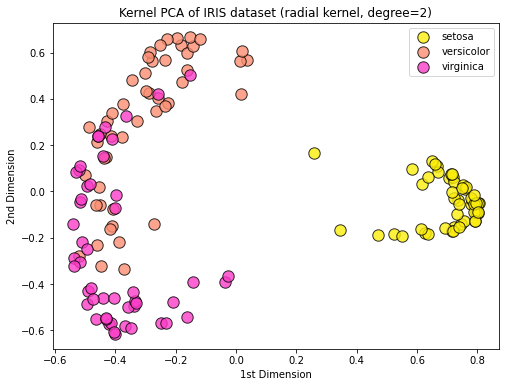

In [98]:
plot_reduced_data(kpca_rbf, X_kpca_rbf, 'Kernel PCA of IRIS dataset (radial kernel, degree=2)')

## Linear Discriminant Analysis (LDA)

A diferencia de PCA, que es un algoritmo de aprendizaje no supervisado, LDA pertenece a la clase de métodos de aprendizaje supervisado. Como tal, el objetivo de LDA es que con la información disponible sobre las etiquetas de clase, LDA buscará maximizar la separación entre las diferentes clases calculando los ejes de los componentes (discriminantes lineales).

### ¿Cuándo debería usar LDA?

Podemos usar LDA solo para aprendizaje supervisado. Esto significa que necesitamos conocer las etiquetas de clase de antemano.

Algunos experimentos compararon la clasificación al usar PCA o LDA. Estos experimentos muestran que la precisión de la clasificación tiende a mejorar cuando se usa PCA. Finalmente, el rendimiento de estas técnicas depende en gran medida de las características del conjunto de datos.

## Ejercicio 4

Calculemos los dos primeros componentes LDA.

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit_transform(X, y)

In [ ]:
plot_reduced_data(lda, X_r2, 'LDA of IRIS dataset')

Tanto en PCA como en LDA, los datos de Setosa están bien separados de las otras dos clases. Además, podemos ver que LDA funciona mejor al mantener al mínimo la superposición entre Versicolor y Virginica.

Cada uno de los tres métodos hasta ahora produjo esencialmente una nueva característica al considerar la transformación lineal/no lineal de las características originales. Al observar solo el primer componente principal de cada uno de los tres métodos hasta ahora, ¿qué método proporcionó la característica más útil si uno estuviera interesado en una tarea de clasificación?

LDA brindaría información más útil en este caso, ya que su objetivo es separar los datos de diferentes clases. Por otro lado, PCA o kernel PCA es en realidad independiente de la clasificación de cada punto. El objetivo principal de PCA o kernel PCA es maximizar la varianza. Sin embargo, no es cierto a priori que las características con varianza máxima tengan la mayor (o incluso ninguna) importancia en términos de clasificación de datos.

## t-distributed Stochastic Neighbouring Entities (t-SNE)

t-SNE es una valiosa técnica de visualización de datos. Es no supervisado y no lineal. t-SNE tiene una función de costo que es no convexa. Por lo tanto, diferentes inicializaciones pueden conducir a diferentes mínimos locales. Si el número de características es muy alto, se recomienda utilizar primero otra técnica para reducir el número de dimensiones.

Aunque t-SNE podría no ser adecuado para el preprocesamiento de datos, sigue siendo útil para visualizar los datos y también para proporcionar información útil (aunque a veces engañosa) sobre las propiedades de agrupación de los datos.

### ¿Cuándo debería usar t-SNE?

t-SNE coloca a los vecinos cerca unos de otros, por lo que no podemos ver claramente cómo se relacionan las muestras con respecto a sus características. Se utiliza para la exploración de datos, especialmente para visualizar datos de alta dimensión.

t-SNE no aprende una función del espacio original al nuevo. Debido a esto, no puede mapear los nuevos datos de acuerdo con los resultados anteriores de t-SNE. En otras palabras, no se puede utilizar en modelos de clasificación.

## Ejercicio 5

Visualicemos nuestro conjunto de datos usando t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, init='random', learning_rate='auto')
X_tsne = tsne.fit_transform(X)

In [ ]:
plot_reduced_data(tsne, X_tsne, title='Iris projection onto the first 2 linear discriminants')

Como se aprecia obtenemos una mejora significativa con respecto a PCA y LDA ya que las especies de Iris forman grupos definidos.

## Ejercicio 6


Vamos a aplicar estos algoritmos de reducción de dimensiones como paso de preprocesamiento para la solución de un problema de aprendizaje. Para ello vamos a comparar diferentes métodos de reducción de dimensionalidad (lineal) aplicados en un conjunto de datos de dígitos (`Digits`).

A continuación, se definen variables para la configuración de los algoritmos utilizados

In [ ]:
n_neighbors = 3
random_state = 0

Luego, cargamos los datos. El conjunto de datos contiene imágenes de dígitos del 0 al 9 con aproximadamente 180 muestras de cada clase. Cada imagen tiene una dimensión de 8x8 = 64 y se reduce a un punto de datos bidimensional.

In [ ]:
# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

Dividimmos nuestro conjunto de datos en dos conjuntos: uno para entrenamiento y otro para prueba.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state
)

Veamos las dimensiones de nuestro conjunto de características y la cantidad de clases.

In [ ]:
dim = len(X[0])
n_classes = len(np.unique(y))
dim, n_classes

Para utilizar reducción de dimensiones, vamos a utilizar un `Pipeline` de `sklearn`.

Un `Pipeline` aplica secuencialmente una lista de transformaciones y un estimador final. Los pasos intermedios del pipeline deben ser 'transformaciones', es decir, deben implementar métodos de `fit` y `transform`. El estimador final solo necesita implementar el método `fit`.

Para contruir un pipeline, podemos usar la función `make_pipeline`, que recibe una lista de transformadores. En nuestro caso, lo usaremos para normalizar los datos (usando `StandardScaler`) y un método de reducción de dimensiones. Nos interesan PCA y LDA.

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

In [ ]:
# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

In [ ]:
# Reduce dimension to 2 with KernelPCA with kernel radia
k_pca = KernelPCA(n_components=2, kernel='rbf')

Luego, usaremos el clasificador de KNN para evaluar los métodos.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

Y creamos una lista de los métodos a comparar.

In [ ]:
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("KernelPCA", k_pca)]

Luego resolvemos el problema de clasificación usando los métodos de reducción de dimensiones

In [ ]:
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    # Ajustamos el modelo del método
    model.fit(X_train, y_train)

    # Ajuste un clasificador vecino más cercano en el conjunto de entrenamiento transformado
    # mediante los métodos de reducción de dimensiones.
    knn.fit(model.transform(X_train), y_train)

    # Calcule la precisión del vecino más cercano en el conjunto de prueba transformado
    # mediante los métodos de reducción de dimensiones.
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Representar el conjunto de datos en 2 dimensiones usando el modelo ajustado
    X_embedded = model.transform(X)

    # Graficar los puntos proyectados y mostrar el resultado de la evaluación
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()